## Astrodinámica para Ingeniería Aeroespacial
### Prof. Jorge I. Zuluaga
### Instituto de Física - Universidad de Antioquia

## Clase 3 - Problema de Lambert (parte 1)
<a target="_blank" href="https://colab.research.google.com/github/seap-udea/notas-astrodyn/blob/main/Clase-03-astrodyn-problema_lambert_1
.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Requerimientos

In [1]:
!pip install -Uq pymcel
!pip install -Uq ipympl

Algunos magics requeridos:

In [2]:
import sys
if 'google.colab' in sys.modules:
    %matplotlib widget
    %matplotlib widget

## Formulación del problema

- Hemos aprendido hasta ahora:

    - Cómo determinar todos la posición y velocidad de un cuerpo sobre una órbita cónica sabiendo conociendo sus elementos orbitales $(a,e,I,\Omega,\omega,f)$.

    - Dado un valor inicial de la anomalía verdadera $f_0$ o el tiempo de paso por el periapsis de un cuerpo, cómo calcular el valor de la anomalía en cualquier momento del futuro.

    - Dada la posición y velocidad de un cuerpo en un momento dado, cómo calcular su posición y velocidad en cualquier momento del futuro.
    
- A esta forma de la solución al problema de los dos cuerpos se la conoce como la solución al problema de valor inicial (*Initial value problem*, IVP).

<!-- https://github.com/seap-udea/notas-astrodyn/blob/main/figuras/?raw=true -->
<center><img src="figuras/problema-lambert.png" width=400></br></center>



- Queremos ahora resolver una versión del problema diferente, una que tiene interesantes aplicaciones en el contexto de la navegación espacial (mecánica orbital):

    - Conozco las posiciones inicial y final de un cuerpo:

        - ¿Cuáles son todas las posibles trayectorias cónicas que unen esos dos puntos?

        - Dada la restricción de requerir que el tiempo de viaje sea uno específico $\Delta t$ ¿Cuál es la trayectoria que sigue? ¿Cuál es la velocidad inicial del cuerpo?

- Esta formulación del problema de los dos cuerpos se conoce matemáticamente como un problema de condiciones de frontera (*Boundary value problem*, BVP) y en la historia como *El problema de Lambert*. 

## El plano del problema de Lambert

- Naturalmente el problema de Lambert general ocurre en tres dimensiones, sin embargo, por la naturaleza del problema de los dos cuerpos, siempre es posible reducir el problema a uno en dos dimensiones.

- Para entenderlo debemos tener en cuenta que el centro del cuerpo central y los dos puntos $P_1$ y $P_2$ forman un plano. En geometría euclidiana, tres puntos definen siempre un plano. 

- Como el movimiento orbital se realiza también sobre un plano (por conservación del momentum angular), plano al que llamamos en mecánica celeste el *plano de Lagrange* y como sobre este plano están siempre los vectores posición y velocidad del cuerpo, entonces el plano de los vectores $\vec r_1$ y $\vec r_2$ debe también el plano de Lagrange.

<!-- https://github.com/seap-udea/notas-astrodyn/blob/main/figuras/?raw=true -->
<center><img src="figuras/problema-lambert-espacio.png" width=600></br></center>

- Podemos entonces definir la matriz de rotación que nos lleva de las coordenadas del sistema de referencia de observación $(x,y,z)$ al sistema de referencia del plano de Lambert en el que el punto $P_1$ siempre está sobre el eje x usando:

  $$
  \left(\begin{array}{c}
  x'''\\y'''\\z'''
  \end{array}\right)
  = R_z(\omega')R_x(I)R_z(\Omega)
  \left(\begin{array}{c}
  x\\y\\z
  \end{array}\right)  
  $$

- Aquí los ángulos $I,\Omega,\omega$ se pueden obtener, primero, calculando 2 vectores claves:

  $$
  \vec h' = \vec r_1 \times \vec r_2\\
  \vec N = \hat e_z \times \vec h'
  $$

> **NOTA**: No debe confundirse el vector $\vec h'\vec r_1 \times \vec r_2$ con el vector de momentum angular específico $\vec h=\vec r\times \vec v$. Aunque tienen la misma dirección (perpendicular al plano de Lambert), no tienen, ni las mismas unidades, ni el mismo significado físico.

  y luego usando productos punto debidamente definidos:

  $$
  \cos I = \frac{\vec h'\cdot \hat e_z}{h'}\\
  \cos \Omega = \frac{\vec N\cdot \hat e_x}{N}\\
  \cos \omega = \frac{\vec r_1\cdot \vec N}{N r_1}\\
  $$

> **NOTA**: Es importante entender aquí la discusión sobre los cuadrantes en los que están los ángulos $\Omega$ y $\omega$. Para un detalle de esa discusión ver *Sección 3.9.1. Determinación de órbita* en el libro de *Mecánica Celeste* de Zuluaga.

- En lo sucesivo la descripción del problema de Lambert se realizará en el sistema de coordenadas sobre el plano de Lambert. Con las definiciones dadas arriba usted siempre podrá pasar los vectores obtenidos en ese plano al plano de observación.

## El problema geométrico

### De la física a la geometría

- Los parámetros geométricos que definen completamente una cónica se pueden obtener a partir de las constantes de movimiento usando:

    - Vector de excentricidad

        $$
        \vec e = \frac{\vec h\times \vec v}{\mu} - \frac{\vec r}{r}
        $$

    - Semilatus rectum:

        $$
        p = \frac{h^2}{\mu}
        $$

        donde $\vec h=\vec r\times \vec v$.

- Dadas estas cantidades siempre es posible deducir otras propiedades geométricas y física de la curva:

  - Excentricidad: $e = |\vec e|$

  - Semieje mayor: $a = p/(1-e^2)$
    - Para una parábola: $a \rightarrow \infty$

  - Energía específica: $\epsilon = v_1^2/2 - \mu/r_1$

    - Para el caso de una elipse: $\epsilon = -\mu/(2a)$
  
  - Excentricidad a partir de los demás parámetros: $e = \sqrt{1 + 2 \epsilon h^2/\mu^2}$

In [1]:
import numpy as np
grados = np.pi/180
radianes = 1/grados

e = 0.5
p = 1 
w = 30*grados
ehat = np.array([np.cos(w),np.sin(w),0])

In [125]:
!pip install -Uq pymcel

In [2]:
import spiceypy as spy
import pymcel as pc
import matplotlib.pyplot as plt
from ipywidgets import interact

# Decorador
@interact(e=(0,5,0.1), p=(0.1,5,0.1), w=(0,360,0.1))
def dibuja_conica(e=0.5,p=1,w=30,show=True):
    # Convierte a radianes
    w = w*grados

    # Dibujo conica
    phi = np.pi if e<1 else np.arccos(-1/e)
    fs = np.linspace(-0.99*phi,0.99*phi,1000)
    rs = p/(1+e*np.cos(fs))

    # Coordenadas naturales de la cónicas
    xps = rs*np.cos(fs)
    yps = rs*np.sin(fs)
    zps = np.zeros_like(fs)

    # Coordenadas observadas (en el plano de Lambert)
    R = spy.rotate(-w,3)
    xs,ys,zs = pc.rota_puntos(R,xps,yps,zps) 

    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(111)

    ax.plot(xs,ys)
    ax.scatter(0,0,marker='x',color='k',s=100,alpha=0.3)
    ax.text(0,0,'F')
    ax.grid()
    ax.set_xlim(-3*p,3*p)
    ax.set_ylim(-3*p,3*p)

    fig.tight_layout()
    if show:
        plt.show()
    else:
        return fig, ax

Paquete pymcel cargado. Versión: 0.6.3


interactive(children=(FloatSlider(value=0.5, description='e', max=5.0), FloatSlider(value=1.0, description='p'…

In [3]:
@interact(e=(0,5,0.1), p=(0.1,5,0.1), w=(0,360,0.1))
def lambert_manual(e=0.1,p=1.0,w=30):
    P1 = np.array([1,0,0])
    P2 = np.array([0.1,1.2,0])

    fig, ax = dibuja_conica(e,p,w,show=False)
    ax.plot(P1[0],P1[1],'ro')
    ax.plot(P2[0],P2[1],'bo')
    plt.show()

interactive(children=(FloatSlider(value=0.1, description='e', max=5.0), FloatSlider(value=1.0, description='p'…

Las dos excentricidades son: 0.8533314563992094, 0.3377151054194339
Los dos argumentos del periapsis son: -133.95223093947584, 13.102720739531922


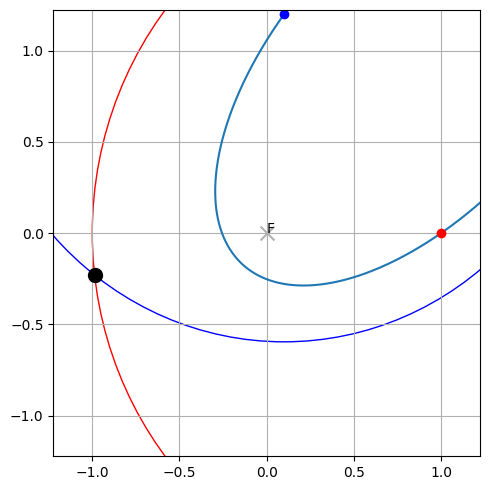

In [39]:
P1 = np.array([1,0,0])
P2 = np.array([0.1,1.2,0])

# Cálculos
a = 1.5
r1 = np.linalg.norm(P1)
r2 = np.linalg.norm(P2)

xs, ys, xts, yts = pc.intersecta_circunferencias(P1[0], P1[1], 2*a-r1, 
                                                 P2[0], P2[1], 2*a-r2)

Fsvec = -np.array([xs,ys,0])
Fstvec = -np.array([xts,yts,0])

es = np.linalg.norm(Fsvec)/(2*a)
est = np.linalg.norm(Fstvec)/(2*a)
print(f"Las dos excentricidades son: {es}, {est}")

ps = a*(1-es**2)
pst = a*(1-est**2)

ehats = Fsvec/np.linalg.norm(Fsvec)
ehatst = Fstvec/np.linalg.norm(Fstvec)

ws = np.arctan2(ehats[1],ehats[0])
wst = np.arctan2(ehatst[1],ehatst[0])
print(f"Los dos argumentos del periapsis son: {ws*radianes}, {wst*radianes}")

# Gráficos
from matplotlib import patches

fig, ax = dibuja_conica(es,ps,ws*radianes,show=False)
# fig, ax = dibuja_conica(est,pst,wst*radianes,show=False)
ax.plot(P1[0],P1[1],'ro')
ax.plot(P2[0],P2[1],'bo')

c1 = patches.Circle(P1,radius=2*a-r1,color='r',fill=False)
ax.add_patch(c1)

c2 = patches.Circle(P2,radius=2*a-r2,color='b',fill=False)
ax.add_patch(c2)

ax.plot(xs,ys,'ko',ms=10)
ax.plot(xts,yts,'ko',ms=10)

plt.show()

### Dibujando una cónica a partir de sus propiedades geométricas

- Para dibujar una cónica debemos específicar o bien sus propiedades físicas o bien sus propiedades geométricas.

- Para cualquier cónica es posible representarla si se proveen tres cantidades: $p$, $e$ y $\omega$.

- Con estas tres cantidades, las coordenadas de cualquier punto sobre la cónica, provistos un conjunto de valores de $f\in(-\phi,\phi)$.

- El ángulo $f_\mathrm{max}$ es el máximo valor de la anomalía verdadera que es igual a:
  - Para elipse $f_\mathrm{max} = \pi$.
  - Para parábola e hipérbola: $\cos f_\mathrm{max} = -1/e$.

- El siguiente código permite dibujar la cónica en su sistema de referencia:

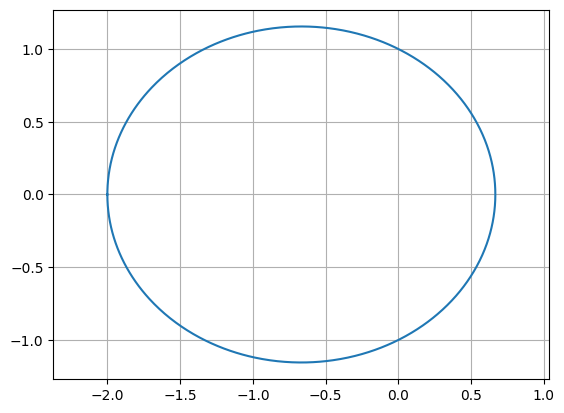

In [35]:
import numpy as np
p = 1
e = 0.5

fmax = 0.99*np.arccos(-1/e) if e>=1 else np.pi
fs = np.linspace(-fmax, fmax, 1000)
rs = p/(1+e*np.cos(fs))

xps = rs*np.cos(fs)
yps = rs*np.sin(fs)
zps = np.zeros_like(xps)

import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(xps, yps)
ax.grid()
ax.axis('equal');

- Si queremos ahora agregar una rotación usaremos:

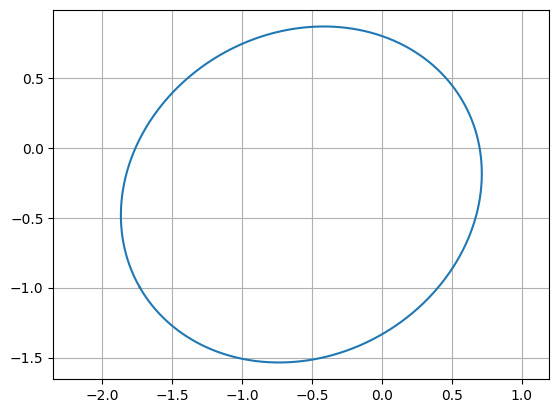

In [36]:
import pymcel as pc
import spiceypy as spy
deg = np.pi/180

w = 30*deg 
R = spy.rotate(-w, 3)
xs, ys, zs = pc.rota_puntos(R,xps,yps,zps)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(xs, ys)
ax.grid()
ax.axis('equal');

- Hagmos ahora un código interactivo que nos permita modificar los tres parámetros $e$, $p$, $\omega$ y dibujar la cónica:

In [79]:
plt.close('all')
from ipywidgets import interact
@interact(e=(0,2,0.1), p=(0,2,0.1), w=(-180,180,0.1), zoom=(1,10,0.1))
def dibuja_conica(e=0.5,p=1,w=0,zoom=1, interactive=False, fig=False):
    w = w*deg
    fmax = 0.99*np.arccos(-1/e) if e>=1 else np.pi
    fs = np.linspace(-fmax, fmax, 1000)
    rs = p/(1+e*np.cos(fs))

    xps = rs*np.cos(fs)
    yps = rs*np.sin(fs)
    zps = np.zeros_like(xps)

    R = spy.rotate(-w, 3)
    xs, ys, zs = pc.rota_puntos(R,xps,yps,zps)

    if fig is False:
        fig = plt.figure(figsize=(5,5))
        ax = fig.add_subplot(111)
    else:
        ax = fig.gca()
    ax.plot(xs, ys)
    range = 2*p*zoom
    ax.set_xlim(-range,range)
    ax.set_ylim(-range,range)
    ax.grid()
    if interactive: 
        plt.show()
    return fig, ax

interactive(children=(FloatSlider(value=0.5, description='e', max=2.0), FloatSlider(value=1.0, description='p'…

### El problema geométrico de Lambert

- Ahora estamos listos para abordar el problema geométrico de Lambert.

- Primero debemos escoger dos puntos:

In [80]:
P1 = [1,0,0]
P2 = [0.5,0.7,0]

- Creemos ahora un interactivo que combine cónica con puntos

In [81]:
@interact
def conica_y_puntos(e='0',p='1',w='0'):
    e = float(e)
    p = float(p)
    w = float(w)

    zoom = 2*np.linalg.norm(P2)/(2*p)
    plt.close('all')
    fig,ax = dibuja_conica(e,p,w,zoom)
    ax.plot(P1[0],P1[1],'ro')
    ax.plot(P2[0],P2[1],'bo')

interactive(children=(Text(value='0', description='e'), Text(value='1', description='p'), Text(value='0', desc…

### Encontrando matemáticamente la cónica que pasa por los puntos

- Como vimos en el apartado anterior, el problema de encontrar la cónica no es para nada trivial: hay una *correlación* entre los parámetros que hace difícil encontrar apropiadamente.

- Resolveremos el problema primero para el caso de elipses que conectan los dos puntos.

- Para ello nos valdremos de una propiedad que tienen las elipses y es aquella de que la suma de la distancia de cualquier punto a los dos focos es siempre igual a $2a$.

- Para los dos puntos tenemos entonces que:

  $$
  P_1 F + P_1 F_* = 2a \\
  P_2 F + P_2 F_* = 2a \\
  $$

- Está relación nos permite encontrar la distancia al foco vacante:

  $$
  P_1 F_* = 2a - r_1\\
  P_2 F_* = 2a - r_2\\
  $$

<!-- https://github.com/seap-udea/notas-astrodyn/blob/main/figuras/?raw=true -->
<center><img src="figuras/foco-vacante.png" width=600></br></center>

- Estas dos ecuaciones indican que el foco vacante se encuentra sobre una circunferencia de radio $2a-r_1$ y $2a-r_2$. Es decir, la ubicación del foco vacante depende de la *elección* del valor de $a$. 

- Dibujemos esas circunferencias en el caso de los puntos:

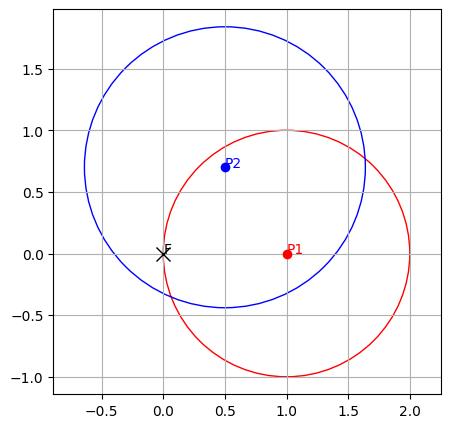

In [91]:
P1 = [1,0,0]
P2 = [0.5,0.7,0]

a = 1
r1 = np.linalg.norm(P1)
r2 = np.linalg.norm(P2)

from matplotlib.patches import Circle

plt.close('all')
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.plot(0,0,'kx',ms=10)
ax.text(0,0,'F')
ax.plot(P1[0],P1[1],'ro')
ax.text(P1[0],P1[1],'P1',color='r')
ax.plot(P2[0],P2[1],'bo')
ax.text(P2[0],P2[1],'P2',color='b')

c1 = Circle(P1,radius=2*a-r1,color='r',fill=False)
ax.add_patch(c1)

c2 = Circle(P2,radius=2*a-r2,color='b',fill=False)
ax.add_patch(c2)

ax.axis('equal')
ax.grid();


- Podemos dibujar esos dos puntos si encontramos los puntos de intersección:

1.7767855851617815 1.8429878335694103
-0.9867682840719326 -0.22967756835587572


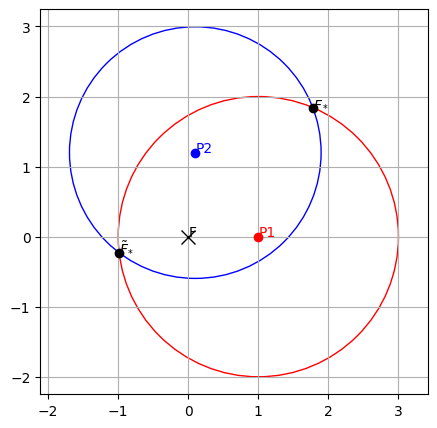

In [30]:
import pymcel as pc

P1 = [1,0,0]
P2 = [0.1,1.2,0]

Fsx,Fsy,Ftx,Fty = pc.intersecta_circunferencias(P1[0],P1[1],2*a-r1,P2[0],P2[1],2*a-r2)
print(Fsx,Fsy)
print(Ftx,Fty)

a = 1.5
r1 = np.linalg.norm(P1)
r2 = np.linalg.norm(P2)

from matplotlib.patches import Circle

plt.close('all')
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.plot(0,0,'kx',ms=10)
ax.text(0,0,'F')
ax.plot(P1[0],P1[1],'ro')
ax.text(P1[0],P1[1],'P1',color='r')
ax.plot(P2[0],P2[1],'bo')
ax.text(P2[0],P2[1],'P2',color='b')

c1 = Circle(P1,radius=2*a-r1,color='r',fill=False)
ax.add_patch(c1)

c2 = Circle(P2,radius=2*a-r2,color='b',fill=False)
ax.add_patch(c2)

ax.plot(Fsx,Fsy,'ko')
ax.text(Fsx,Fsy,r'$F_*$',color='k')

ax.plot(Ftx,Fty,'ko')
ax.text(Ftx,Fty,r'$\tilde F_{*}$',color='k')

ax.axis('equal')
ax.grid();


- Estos dos focos definen las dos elipses que pueden pasar por los puntos $P_1$ y $P_2$. 

- Podemos dibujar las elipses si, usando la posición de los focos vacantes calculamos el parámetro $\omega$ correspondiente a cada foco. 

- Para ello definimos el vector unitario $\hat e$:

  $$
  \hat e = -\vec F_* / F_*
  $$

- Tambipen necesitamos calcular la excentricidad:

  $$
  e = \frac{|\vec F_*|}{2a}
  $$

In [27]:
print(Fsvec, Fstvec)

[1.77678559 1.84298783 0.        ] [ 0.98676828  0.22967757 -0.        ]


In [34]:
Fsvec = np.array([Fsx,Fsy,0])
Ftvec = np.array([Ftx,Fty,0])
print(Fsvec,Ftvec)

# Dirección de los vectores de excentricidad
ehats = -Fsvec/np.linalg.norm(Fsvec)
ehatt = -Ftvec/np.linalg.norm(Ftvec)
ws = np.arctan2(ehats[1],ehats[0])
wt = np.arctan2(ehatt[1],ehatt[0])

#ws = np.arctan2(Fsy,Fsx)
#wt = np.arctan2(Fty,Ftx)

print(ws*radianes,wt*radianes)

rad = 180/np.pi
print(ws*rad, wt*rad)

# Excentricidades
es = np.linalg.norm(Fsvec)/(2*a)
et = np.linalg.norm(Ftvec)/(2*a)
print(es,et)

# Semiejes mayores 
ps = a*(1-es**2)
pt = a*(1-et**2)
print(ps,pt)


[1.77678559 1.84298783 0.        ] [-0.98676828 -0.22967757  0.        ]
-133.95223093947584 13.102720739531922
-133.95223093947584 13.102720739531922
0.8533314563992094 0.3377151054194339
0.4077381382794063 1.328922761357311


In [36]:
Fsvec = np.array([Fsx,Fsy,0])
Ftvec = np.array([Ftx,Fty,0])
print(Fsvec,Ftvec)

# Dirección de los vectores de excentricidad
ehats = -Fsvec/np.linalg.norm(Fsvec)
ehatt = -Ftvec/np.linalg.norm(Ftvec)
ws = np.arctan2(ehats[1],ehats[0])
wt = np.arctan2(ehatt[1],ehatt[0])

#ws = np.arctan2(Fsy,Fsx)
#wt = np.arctan2(Fty,Ftx)
print(ws*radianes,wt*radianes)

rad = 180/np.pi
print(ws*rad, wt*rad)

# Excentricidades
es = np.linalg.norm(Fsvec)/(2*a)
et = np.linalg.norm(Ftvec)/(2*a)
print(es,et)

# Semiejes mayores 
ps = a*(1-es**2)
pt = a*(1-et**2)
print(ps,pt)


[1.77678559 1.84298783 0.        ] [-0.98676828 -0.22967757  0.        ]
-133.95223093947584 13.102720739531922
-133.95223093947584 13.102720739531922
0.8533314563992094 0.3377151054194339
0.4077381382794063 1.328922761357311


- Con esta información podemos ahora dibujar las cónicas correspondientes:
fig,ax = plt.subplots(figsize=(5,5))

zoom = 2*np.linalg.norm(P2)/(2*ps)
dibuja_conica(es,ps,ws*rad,zoom,False,fig)
ax.plot(P1[0],P1[1],'ro')
ax.plot(P2[0],P2[1],'bo')

zoom = 2*np.linalg.norm(P2)/(2*pt)
dibuja_conica(et,pt,wt*rad,zoom,False,fig)
ax.plot(P1[0],P1[1],'ro')
ax.plot(P2[0],P2[1],'bo')

## Soluciones extremas

### Solución de mínima energía

- Existen dos casos extremos para las cónicas.

- El primer caso corresponde a la situación cuando el valor de $a$ es tal que las circungerencias alrededor de los puntos se intersecan en un solo punto.

- En este caso se cumple que:

  $$
  (2a - r_1) + (2a - r_2) = |\vec r_2 - \vec r_1|
  $$

- Si llamamos $c = |\vec r_2 - \vec r_1|$ entonces:

  $$
  a_m = \frac{r_1 + r_2 + c}{4}
  $$

- Ninguna órbita elíptica con un eje mayor menor que este valor podrá encontrarse para unir los puntos, por eso llamamos a este el semieje mayor mínimo.

- En términos de la energía de la órbita:

  $$
  \epsilon = -\frac{\mu}{2a}
  $$
  el valor mínimo de $a$ implicará el máximo valor absoluto de $\epsilon$, pero como la energía es negativa esto implicará que la trayectoria con semije mayor $a_m$ será la de mínima energía.  Es decir, la razón por la cuál no podemos encontrar una órbita con $a<a_m$ es porque no tendría suficiente energía para llevar a la partícula hasta allí. 

- La cantidad $r_1 + r_2 + c$ es el perímetro del tríangulo que forman el foco y los dos puntos que llamaremos el **triángulo espacial**.

- Si definimos la cantidad $s$:

  $$
  s = \frac{r_1 + r_2 + c}{2}
  $$
  entonces el semiejemayor mínimo será:

  $$
  a_m = \frac{s}{2}
  $$

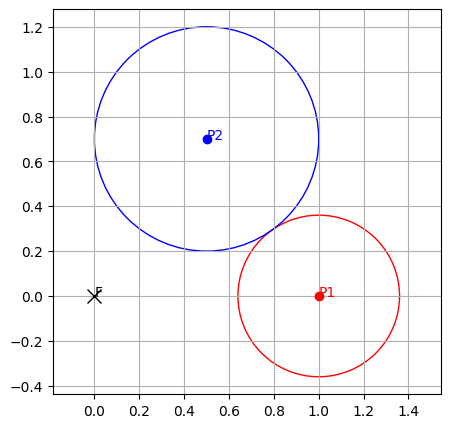

In [96]:
import pymcel as pc

Fsx,Fsy,Ftx,Fty = pc.intersecta_circunferencias(P1[0],P1[1],2*a-r1,P2[0],P2[1],2*a-r2)

P1 = np.array([1,0,0])
P2 = np.array([0.5,0.7,0])
r1 = np.linalg.norm(P1)
r2 = np.linalg.norm(P2)
c = np.linalg.norm(P2-P1)
s = (r1+r2+c)/2

a = s/2
r1 = np.linalg.norm(P1)
r2 = np.linalg.norm(P2)

from matplotlib.patches import Circle

plt.close('all')
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.plot(0,0,'kx',ms=10)
ax.text(0,0,'F')
ax.plot(P1[0],P1[1],'ro')
ax.text(P1[0],P1[1],'P1',color='r')
ax.plot(P2[0],P2[1],'bo')
ax.text(P2[0],P2[1],'P2',color='b')

c1 = Circle(P1,radius=2*a-r1,color='r',fill=False)
ax.add_patch(c1)

c2 = Circle(P2,radius=2*a-r2,color='b',fill=False)
ax.add_patch(c2)

ax.axis('equal')
ax.grid();


- La posición del foco en este caso será:

In [111]:
Fsvec = P1 + (P2-P1)*(2*am-r1)/c
ehats = -Fsvec/np.linalg.norm(Fsvec)
ws = np.arctan2(ehats[1],ehats[0])
print(ws*rad)
es = np.linalg.norm(Fsvec)/(2*a)
print(es)
ps = a*(1-es**2)
print(ps)


-159.65702239315593
0.6199024822459169
0.4187618062809037


- Dibujemos la trayectoria:

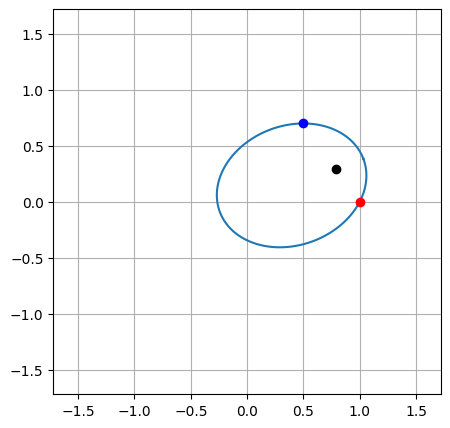

In [112]:
fig,ax = plt.subplots(figsize=(5,5))

zoom = 2*np.linalg.norm(P2)/(2*ps)
dibuja_conica(es,ps,ws*rad,zoom,False,fig)
ax.plot(Fsvec[0],Fsvec[1],'ko') 
ax.plot(P1[0],P1[1],'ro')
ax.plot(P2[0],P2[1],'bo')

### Órbita de excentricidad mínima

- Una interesante propiedad de las órbitas que conectan los puntos tiene que ver son su vector de excentricidad.

- Por la solución misma del problema de los dos cuerpos:

  $$
  r=\frac{p}{1+e\cos f}
  $$

- Esta ecuación es equivalente a:
  $$
  \vec r\cdot \vec e = p - r
  $$

- Si escribimos la misma ecuación para los dos puntos obtenemos:

  $$
  \vec r_1\cdot \vec e = p - r_1
  \vec r_2\cdot \vec e = p - r_2
  $$

- Restando y dividiendo por $c = |\vec r_2-\vec r_1|$ obtenemos:

  $$
  \vec e\cdot (\vec r_2-\vec r_1)/c = -(r_2 - r_1) / c
  $$

- El significado de este resultado es que la proyección del vector de excentricidad sobre el vector que une los dos puntos es siempre constante. 

- Podemos encontrar la trayectoria de mínima excentricidad, cuando el vector de excentricidad es paralelo a la línea que los une. En este caso

  $$
  e_s = \frac{r_2 - r_1}{s}
  $$

- Una vez tengo la excentricidad puedeo calcular el semilatus rectum para ello puedo usar:

  $$
  p = \vec r_1\cdot \vec e + r_1 
  $$

- Pero necesitamos saber la dirección del vector $\vec e$. Para ello podemos usar:

  $$
  \vec e\cdot (\vec r_2-\vec r_1)/c = -(r_2 - r_1) / c
  $$
  que muestra que el vector $\vec e$ va en dirección opuesta a $\vec r_2-\vec r_1$ de modo que finalmente

  $$
  p_s = e \vec r_1\cdot (\vec r_2-\vec r_1)/c + r_1
  $$


### Para saber más

Consulte el repositorio en línea del curso para otro material.

<hr/>

*Los cuadernos de clase del curso de astrodinámica también están [disponibles en línea](https://github.com/seap-udea/notas-astrodyn).*